# cygnus-equalprefetch
9/12/2023

Compare Cygnus and Pythia at fixed degrees, with few/no optimizations enabled.
- Pythia
- Cygnus-Depth
- Cygnus-Width
- *Degrees*: 1, 2, 4
- *Binary*: `cygnus` (Arm core with fast DRAM) to avoid having memory be a bottleneck

In [1]:
import os
import sys
sys.path.append(os.path.abspath("../../"))

from collections import defaultdict
from importlib import reload
from matplotlib import colormaps
import pandas as pd
# from utils import plots, stats, tables, utils

from plot_utils import collate, plot

# Configuration

In [2]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/cygnus" # cygnus binary
baseline_study = "stu_prefetchers"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
    "gap_real"
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150

In [3]:
reload(collate)
studies = {
    # Baseline
    "stu_equalprefetch": collate.StudyCollator(sim_dir, "stu_equalprefetch", 
                                               baseline_study=baseline_study, 
                                               baseline_experiment=baseline_experiment,
                                               weights_path=weights_path,
                                               experiments = ["pf_pythia__deg1", "pf_pythia__deg2", "pf_pythia__deg4",
                                                              "pf_cygnus__deg1", "pf_cygnus__deg2", "pf_cygnus__deg4",
                                                              "pf_cygnus_depth__deg1", "pf_cygnus_depth__deg2", "pf_cygnus_depth__deg4"]),
    "stu_prefetchers": collate.StudyCollator(sim_dir, "stu_prefetchers",
                                             baseline_study=baseline_study,
                                             baseline_experiment=baseline_experiment,
                                             weights_path=weights_path,
                                             experiments = ["pf_pythia", "pf_cygnus", "pf_cygnus_depth"]),
}

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 2952/2952 [00:37<00:00, 79.38file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 121 benchmarks over 9 experiments:
    Benchmarks : bfs__amazon-2008.mtx 605.mcf pr__wikipedia-20051105.mtx bc__sx-stackoverflow_C2Q.mtx sphinx3 bfs__netherlands_osm.mtx pr__com-Youtube.mtx pr__coAuthorsDBLP.mtx bc__coAuthorsDBLP.mtx bc__coPapersDBLP.mtx 623.xalancbmk cc delta bfs__dblp-2010.mtx pr__wikipedia-20060925.mtx bc__amazon0601.mtx merced bfs__amazon0601.mtx bfs__coAuthorsCiteseer.mtx omnetpp 649.fotonik3d sssp bc__sx-stackoverflow_A2Q.mtx charlie bc__com-Youtube.mtx pr__dblp-2010.mtx lbm cc__citationCiteseer.mtx bc__wikipedia-20051105.mtx cc__netherlands_osm.mtx bc__netherlands_osm.mtx libquantum cc__coPapersDBLP.mtx bfs__in-2004.mtx pr__web-Google.mtx classifcation bc__wiki-topcats.mtx cc__sx-stackoverflow.mtx cc__soc-LiveJournal1.mtx bfs__belgium_osm.mtx leslie3d pr__cnr-2000.mtx GemsFDTD cassandra pr__soc-LiveJournal1.mtx 619.lbm pr__coPapersCiteseer.mtx pr__sx-stackoverflow.mtx mcf bc__sx-stackoverflow.mtx cc_

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 1089/1089 [00:06<00:00, 175.11it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 9 experiments:
    Suites     : spec06 spec17 google cloudsuite gap all gap_real
    Experiments: pf_pythia__deg2 pf_pythia__deg4 pf_cygnus__deg1 pf_cygnus_depth__deg1 pf_pythia__deg1 pf_cygnus__deg4 pf_cygnus_depth__deg2 pf_cygnus__deg2 pf_cygnus_depth__deg4
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 63/63 [00:05<00:00, 10.77it/s]
[ipykernel_launcher][angrist-3] Reading study files:  71%|███████   | 925/1312 [00:09<00:03, 113.93file/s]

[ipykernel_launcher][angrist-3] /u/cmolder/GitHub/ChampSim/sim/cygnus/stu_prefetchers/pf_cygnus_depth/pr__citationCiteseer.mtx/pr__citationCiteseer.mtx__5200000000.OUT missing key: cpu.cpu0.total_stall_instructions
[ipykernel_launcher][angrist-3] /u/cmolder/GitHub/ChampSim/sim/cygnus/stu_prefetchers/pf_cygnus_depth/pr__citationCiteseer.mtx/pr__citationCiteseer.mtx__5200000000.OUT missing key: cpu.cpu0.total_stall_cycles
[ipykernel_launcher][angrist-3] /u/cmolder/GitHub/ChampSim/sim/cygnus/stu_prefetchers/pf_cygnus_depth/pr__citationCiteseer.mtx/pr__citationCiteseer.mtx__5200000000.OUT missing key: cpu.cpu0.memory_stall_instructions
[ipykernel_launcher][angrist-3] /u/cmolder/GitHub/ChampSim/sim/cygnus/stu_prefetchers/pf_cygnus_depth/pr__citationCiteseer.mtx/pr__citationCiteseer.mtx__5200000000.OUT missing key: cpu.cpu0.memory_stall_cycles


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 1312/1312 [00:15<00:00, 86.19file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 121 benchmarks over 4 experiments:
    Benchmarks : bfs__amazon-2008.mtx 605.mcf pr__wikipedia-20051105.mtx bc__sx-stackoverflow_C2Q.mtx sphinx3 bfs__netherlands_osm.mtx pr__com-Youtube.mtx pr__coAuthorsDBLP.mtx bc__coAuthorsDBLP.mtx bc__coPapersDBLP.mtx 623.xalancbmk cc delta bfs__dblp-2010.mtx pr__wikipedia-20060925.mtx bc__amazon0601.mtx merced bfs__amazon0601.mtx bfs__coAuthorsCiteseer.mtx omnetpp 649.fotonik3d sssp bc__sx-stackoverflow_A2Q.mtx charlie bc__com-Youtube.mtx pr__dblp-2010.mtx lbm cc__citationCiteseer.mtx bc__wikipedia-20051105.mtx cc__netherlands_osm.mtx bc__netherlands_osm.mtx libquantum cc__coPapersDBLP.mtx bfs__in-2004.mtx pr__web-Google.mtx classifcation bc__wiki-topcats.mtx cc__sx-stackoverflow.mtx cc__soc-LiveJournal1.mtx bfs__belgium_osm.mtx leslie3d pr__cnr-2000.mtx GemsFDTD cassandra pr__soc-LiveJournal1.mtx 619.lbm pr__coPapersCiteseer.mtx pr__sx-stackoverflow.mtx mcf bc__sx-stackoverflow.mtx cc_

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 484/484 [00:02<00:00, 174.55it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 4 experiments:
    Suites     : spec06 spec17 google cloudsuite gap all gap_real
    Experiments: pf_cygnus_depth pf_pythia pf_cygnus _baseline
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 28/28 [00:02<00:00,  9.78it/s]


# Degree sweep

In [14]:
degreedyn_1core_df = {
    'Cygnus Width-1': studies['stu_equalprefetch']['pf_cygnus__deg1'],
    'Cygnus Width-2': studies['stu_equalprefetch']['pf_cygnus__deg2'],
    'Cygnus Width-4': studies['stu_equalprefetch']['pf_cygnus__deg4'],
    'Cygnus Width-dyn+opt': studies['stu_prefetchers']['pf_cygnus'],
    
    'Cygnus Depth-1': studies['stu_equalprefetch']['pf_cygnus_depth__deg1'],
    'Cygnus Depth-2': studies['stu_equalprefetch']['pf_cygnus_depth__deg2'],
    'Cygnus Depth-4': studies['stu_equalprefetch']['pf_cygnus_depth__deg4'],
    'Cygnus Depth-dyn+opt': studies['stu_prefetchers']['pf_cygnus_depth'],

    'Pythia Depth-1': studies['stu_equalprefetch']['pf_pythia__deg1'],
    'Pythia Depth-2': studies['stu_equalprefetch']['pf_pythia__deg2'],
    'Pythia Depth-4': studies['stu_equalprefetch']['pf_pythia__deg4'],
    'Pythia Depth-dyn+opt': studies['stu_prefetchers']['pf_pythia'],
}
degreedyn_1core_colors = defaultdict(lambda: None, {
    'Cygnus Width-1': colormaps['Set3'](0),
    'Cygnus Width-2': colormaps['Set3'](0),
    'Cygnus Width-4': colormaps['Set3'](0),
    'Cygnus Width-dyn+opt': colormaps['Set3'](0),

    'Cygnus Depth-1': colormaps['Set3'](1),
    'Cygnus Depth-2': colormaps['Set3'](1),
    'Cygnus Depth-4': colormaps['Set3'](1),
    'Cygnus Depth-dyn+opt': colormaps['Set3'](1),

    'Pythia Depth-1': colormaps['Set3'](2),
    'Pythia Depth-2': colormaps['Set3'](2),
    'Pythia Depth-4': colormaps['Set3'](2),
    'Pythia Depth-dyn+opt': colormaps['Set3'](2),
})
degreedyn_1core_hatches = defaultdict(lambda: None, {
    'Cygnus Width-1': None,
    # 'Cygnus Width-2': '/',
    # 'Cygnus Width-4': '-',
    'Cygnus Width-dyn+opt': 'x',

    'Cygnus Depth-1': None,
    # 'Cygnus Depth-2': '/',
    # 'Cygnus Depth-4': '-',
    'Cygnus Depth-dyn+opt': 'x',

    'Pythia Depth-1': None,
    # 'Pythia Depth-2': '/',
    # 'Pythia Depth-4': '-',
    'Pythia Depth-dyn+opt': 'x',
})

degreedyn_1core_legend_kwargs = {
    'ncol': 3,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_legend_kwargs_wide = {
    'ncol': 6,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

## IPC improvement

In [12]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Cygnus Width-1,31.08,19.76,6.15,22.83,10.99,17.834186
Cygnus Width-2,37.26,21.26,7.85,26.07,12.66,20.584821
Cygnus Width-4,36.08,20.38,7.77,27.38,12.37,20.370379
Cygnus Width-dyn+opt,44.15,23.72,8.17,28.26,13.95,23.036336
Cygnus Depth-1,31.08,19.76,6.15,22.83,10.99,17.834186
Cygnus Depth-2,34.14,20.02,6.97,25.34,11.84,19.275749
Cygnus Depth-4,34.37,19.67,7.20,27.02,11.93,19.635536
Cygnus Depth-dyn+opt,34.16,20.02,7.03,24.85,12.06,19.246124
Pythia Depth-1,24.18,14.94,5.63,22.39,10.39,15.291465
Pythia Depth-2,30.90,18.72,6.53,23.94,11.87,18.078851


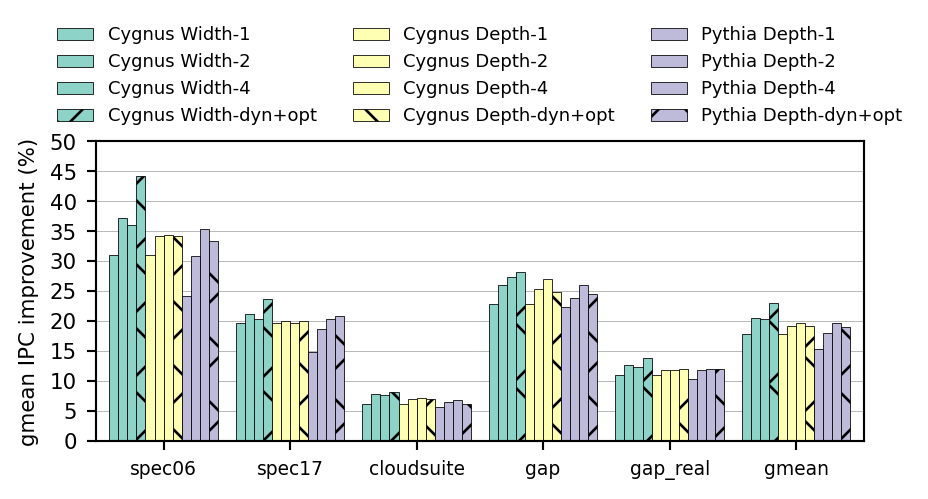

In [15]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7))

### spec06

In [ ]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

In [ ]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

### gap

In [ ]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

In [ ]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

### gap_real

In [ ]:
reload(plot)
pd.set_option('display.max_rows', 500)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real", "cpu.gmean.ipc_improvement",
    add_mean=True).T

## IPC

In [ ]:
degreedyn_1core_df_plus_baseline = {
    'Baseline':     studies['stu_prefetchers']['_baseline'],
    'Cygnus':       studies['stu_prefetchers']['pf_cygnus'],
    'Cygnus Depth': studies['stu_prefetchers']['pf_cygnus_depth'],
    'Pythia':       studies['stu_prefetchers']['pf_pythia'],
    #'Bingo':   studies['stu_prefetchers']['pf_bingo'],
    #'SMS':     studies['stu_prefetchers']['pf_sms'],
    #'SPP':     studies['stu_prefetchers']['pf_spp'],
    'SPP+PPF': studies['stu_prefetchers']['pf_spp_ppf'],
    #'MLOP':    studies['stu_prefetchers']['pf_mlop'],
    #'DSPatch': studies['stu_prefetchers']['pf_dspatch'],
    'my5':     studies['stu_prefetchers']['pf_my5'],
}

reload(plot)
plot.get_suite_table(
    degreedyn_1core_df_plus_baseline, "cpu.gmean.ipc",
    suites=suites, add_mean=True)

In [ ]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df_plus_baseline, "cpu.gmean.ipc",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC',
    ylim=(0, 2.0),
    ytick_distance=0.2,
    dpi=192, figsize=(5, 2.7))

### spec06

In [ ]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df_plus_baseline, "spec06", "cpu.gmean.ipc",
    add_mean=True).T

In [ ]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df_plus_baseline, "spec06", "cpu.gmean.ipc",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC',
    ylim=(0, 2.5),
    ytick_distance=0.2,
    dpi=192, figsize=(10, 3))

## L2C accuracy

In [ ]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='amean L2C prefetch accuracy (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

### spec06

In [ ]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_accuracy",
    add_mean=True).T

In [ ]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='L2C prefetch accuracy (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))


## L2C coverage

In [ ]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='amean L2C prefetch coverage (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

### spec06

In [ ]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    add_mean=True).T

In [ ]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='L2C prefetch coverage (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))